* **In this code I use the data of top 50 players of 5 leagues of Europe gather from the whoscored.com for the season 2019-20. This dataset consists of data of 50 top players according to the rating given by whoscored.com. Then I use the k-mean algorithm to create clusters based on their performance.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/whoscoredcom/football.csv


  **Installing the Libraries**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df=pd.read_csv("../input/whoscoredcom/football.csv")
df.set_index("R",inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         50 non-null     object 
 1   Name           50 non-null     object 
 2   Club           50 non-null     object 
 3   Age            50 non-null     object 
 4   Main position  50 non-null     object 
 5   Apps           50 non-null     int64  
 6   Mins           50 non-null     int64  
 7   Goals          50 non-null     int64  
 8   Assists        50 non-null     int64  
 9   Shot per Game  50 non-null     float64
 10  Key Pass       50 non-null     float64
 11  Drb            50 non-null     float64
 12  Fouled         50 non-null     float64
 13  Rating         50 non-null     float64
dtypes: float64(5), int64(4), object(5)
memory usage: 5.9+ KB


**Dataset info**

In [4]:
df.head()

,Player,Name,Club,Age,Main position,Apps,Mins,Goals,Assists,Shot per Game,Key Pass,Drb,Fouled,Rating
R,,,,,,,,,,,,,,
1,Lionel Messi,Messi,Barcelona,32,FW,21,1891,19,12,4.8,2.5,5.4,1.7,8.61
2,Neymar,Neymar,Paris Saint-Germain,28,FW,15,1322,13,6,4.7,2.6,6.0,4.1,8.58
3,Robert Lewandowski,Lewandowski,Bayern Munich,31,FW,23,2042,25,3,4.7,1.2,2.1,1.5,8.16
4,Kylian Mbappé,Mbappé,Paris Saint-Germain,21,FW,17,1516,18,5,4.4,2.0,2.8,1.1,8.14
5,Josip Ilicic,Ilicic,Atalanta,32,FW,19,1492,15,5,3.6,2.5,2.6,2.4,7.95


**Visualization**

**Scatter Plot of Goals VS Assists of Top Players**

In [5]:
fig = px.scatter(df,x="Assists",y="Goals",color="Player",text="Name",title="Goals Vs Assists")
fig.update_traces(textposition='top center')
fig.show()

*  From the above chart we can see that De Bruyne and Muller top the assists chart and Immobile & Lewandowski top the goal chart.
* On the other side, we can see that Messi is quite brilliant in front of the goal providing a distinctive number of goals and assists for Barcelona.
* Neymar,Mbappe,Benezema and Rashford are top scorer of their club all in the range of 12 to 18 goals and 4to 8 assists.
* Sancho also done quite well with a double digits goals and assists.
* Whereas Ronaldo has good season in terms of scoring goals.

**3D plot for Drbbile, Key Pass and Shot per Game**

In [6]:
fig = px.scatter_3d(df,x="Drb",y="Key Pass",z="Shot per Game",color="Player",text="Name",
                    title="Dribbling PerG VS Key Pass PerG VS Shot per Game")
fig.update_traces(textposition='top center')
figsize=(18,8)
fig.show()

Conclusion from the Above Chart
1. Messi and Neymar are the most offensively contributing player in the top club ranking with the highest number of Key Pass, Shot per game.
1. Ronaldo game is now changing from dribbling to more of a striker role and he also records the highest number of shots per game.
1. Adama Traore recorded an almost equal number of dribble per game as Messi recorded. 

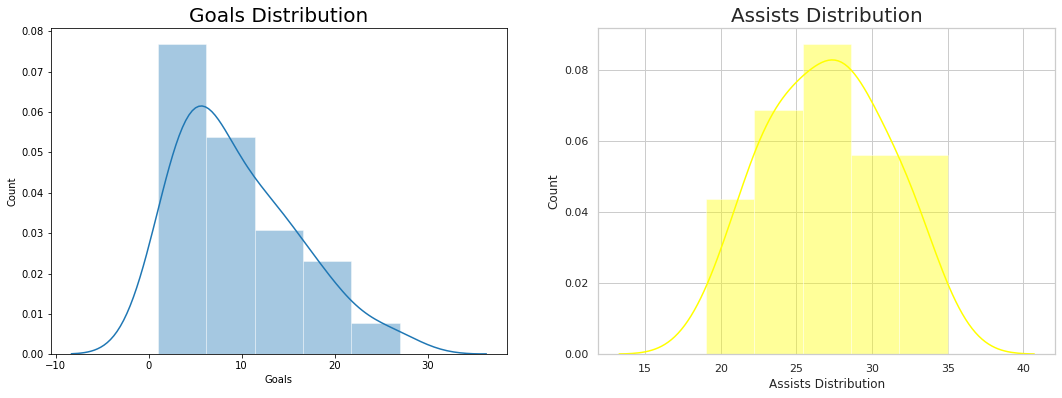

In [7]:

plt.rcParams['figure.figsize'] = (18, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Goals'])
plt.title('Goals Distribution', fontsize = 20)
plt.xlabel('Goals')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'yellow')
plt.title('Assists Distribution', fontsize = 20)
plt.xlabel('Assists Distribution')
plt.ylabel('Count')
plt.show()

**K-Mean Algorithm for clustering player on the basis of Goals and Assists**

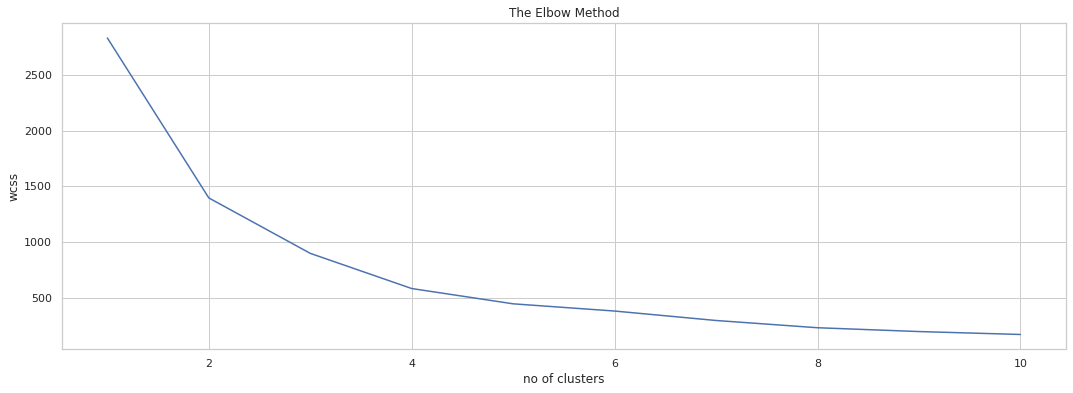

In [8]:
X= df.iloc[:, [8,7]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show() 

**Baesd on the result of elbow method we can get the number of cluster=4 **

In [9]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
df["label"]=labels
df.loc[df['label'] == 3, 'Category'] = 'magician'
df.loc[df['label'] == 2, 'Category'] = 'Star Performer'
df.loc[df['label'] == 1, 'Category'] = 'Tornado'
df.loc[df['label'] == 0, 'Category'] = 'contributer'


**Model Descriptio**n
With the help of K-mean we are able to create a cluster of players on the basis of goals and assists they provide. These clusters are as follow
1. Star Performer ---->More contribution through goals than assits
1. Magician -----> more contribution through assists for the team
1. Tornado ------> Average contribution through assits and goal
1. Contributer -----> Low contribution through assits and goal


**Scatter plot of clusters**

In [10]:
fig = px.scatter(df,x="Assists",y="Goals",color="Category",text="Name",title="K-mean clustering of Assists VS Goals")
fig.update_traces(textposition='top center')
fig.show()

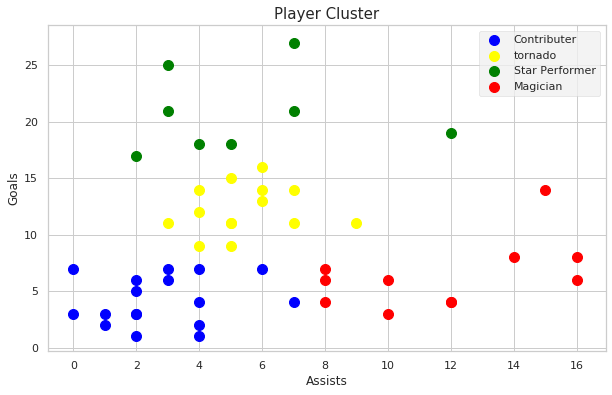

In [11]:
fig=plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Contributer')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'Yellow', label = 'tornado')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Star Performer')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'red', label = 'Magician')
plt.style.use('fivethirtyeight')
plt.title('Player Cluster', fontsize = 15)
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.legend()